In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import smplotlib
from scipy.integrate import odeint, ode, solve_ivp
from scipy.optimize import root

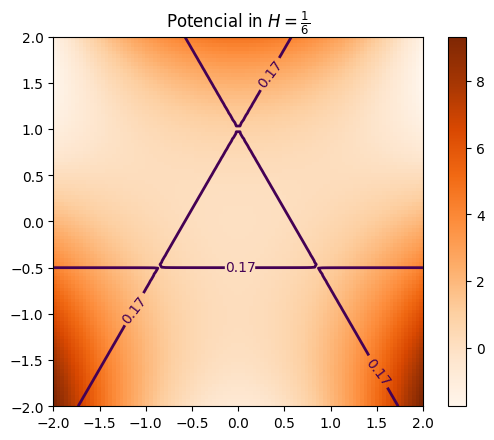

In [2]:
def U(x,y):
    return 0.5*x**2+0.5*(y**2)+(x**2)*y-(y**3)/3
xi = np.linspace(-2,2,100)
yi = np.linspace(-2,2,100)
xx,yy = np.meshgrid(xi,yi)
slika_potenciala = U(xx,yy)
im = plt.imshow(slika_potenciala,cmap="Oranges", extent=(xi.min(),xi.max(),yi.min(),yi.max())) # drawing the function
# adding the Contour lines with labels
plt.cset = plt.contour(slika_potenciala,[6**(-1)],linewidths=2,extent=(xi.min(),xi.max(),yi.min(),yi.max()))
plt.clabel(plt.cset,inline=True,fmt='%1.2f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.title(r"""Potencial in $H=\frac{1}{6}$""")
plt.savefig("images/2024-2-skica_potenciala.pdf", bbox_inches="tight")
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import smplotlib
from scipy.integrate import odeint, ode, solve_ivp
from scipy.optimize import root


initial = np.array([0.3, 0, 0.1, 0.12])
def test_initial(initial):
    x, y, u, v = initial
    def U(x, y):
        return 0.5 * x**2 + 0.5 * (y**2) + (x**2) * y - (y**3) / 3
    assert U(x, y) + 0.5 * v**2 + 0.5 * u**2 < 1 / 6
test_initial(initial)


def odes(t, INP):
    Y = np.zeros(4, dtype=float)
    x,y,u,v = INP
    Y[0], Y[1] = u, v
    Y[2] = -x - 2 * x * y
    Y[3] = -y - x**2 + y**2
    return Y
def crosses_x(t, arej):
    return arej[1]
crosses_x.direction = 1





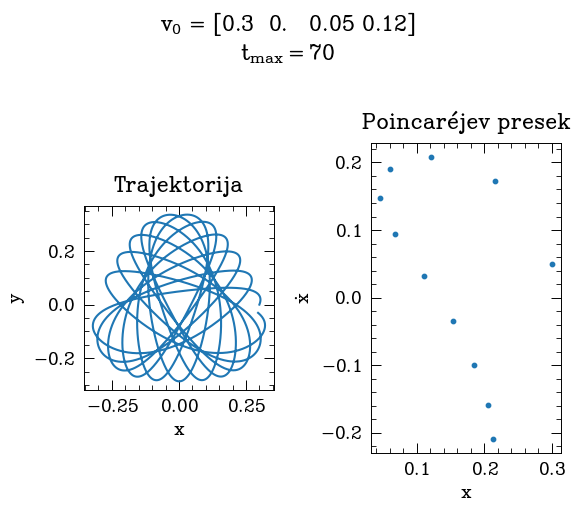

In [4]:
TMAX = 70
initial = np.array([0.3, 0, 0.05, 0.12])
test_initial(initial)
t_span = np.arange(0, TMAX, 0.01)
sol = solve_ivp(
        odes,
        t_span=[t_span.min(), t_span.max()],
        t_eval=t_span,
        tfirst=True,
        y0=initial,
        dense_output=True,
        rtol=1e-20,
        atol=1e-20,
        events=crosses_x,
    )
fig, [ax1, ax2] = plt.subplots(ncols=2)
ax1.plot(sol.y[0, :], sol.y[1, :])
ax1.set_aspect("equal")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax2.scatter(sol.y_events[0][:, 0], sol.y_events[0][:, 2], s=10, marker="o", edgecolors="face")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\dot{x}$")
plt.gca().set_aspect("equal")
plt.tight_layout()
fig.suptitle(f"$v_0$ = " + str(initial) +"\n"+ fr"$t_{'{max}'}={TMAX}$")
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
plt.savefig("images/2-0-testna-orbita.pdf")
plt.show()

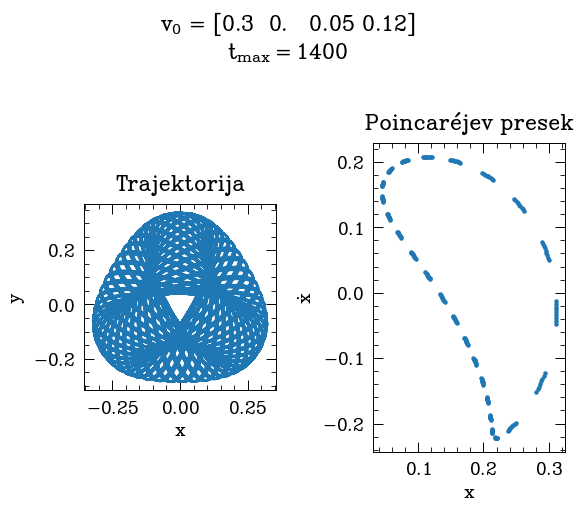

In [5]:
TMAX = 1400
initial = np.array([0.3, 0, 0.05, 0.12])
test_initial(initial)
t_span = np.arange(0, TMAX, 0.01)
sol = solve_ivp(
        odes,
        t_span=[t_span.min(), t_span.max()],
        t_eval=t_span,
        tfirst=True,
        y0=initial,
        dense_output=True,
        rtol=1e-20,
        atol=1e-20,
        events=crosses_x,
    )
fig, [ax1, ax2] = plt.subplots(ncols=2)
ax1.plot(sol.y[0, :], sol.y[1, :])
ax1.set_aspect("equal")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax2.scatter(sol.y_events[0][:, 0], sol.y_events[0][:, 2], s=5, marker="o", edgecolors="face")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\dot{x}$")
plt.gca().set_aspect("equal")
plt.tight_layout()
fig.suptitle(f"$v_0$ = " + str(initial) +"\n"+ fr"$t_{'{max}'}={TMAX}$")
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
plt.savefig("images/2-0-testna-orbita_dolga.pdf")
plt.show()

In [6]:
import sys
minfloat = sys.float_info.min



def get_end_point(initial):
    TMAX = 1000
    gold = initial
    initial[1] = initial[1] + minfloat
    def odes(t, INP):
        Y = np.zeros(4, dtype=float)
        x,y,u,v = INP
        Y[0], Y[1] = u, v
        Y[2] = -x - 2 * x * y
        Y[3] = -y - x**2 + y**2
        return Y
    def crosses_x(t, arej):
        return arej[1]
    crosses_x.direction = 1
    crosses_x.terminal = 1
    sol = solve_ivp(
        odes,
        t_span=[0, TMAX],
        # t_eval=t_span,
        tfirst=True,
        y0=initial,
        dense_output=True,
        rtol=1e-20,
        atol=1e-20,
        events=crosses_x,
    )
    # print(sol.message)
    return sol
H = 0.1
X0 = 0.1
Y0 = 0
V = U(X0, Y0)
T = H - V
mag = np.sqrt(2 * T)
alpha = np.pi/4
u = mag * np.cos(alpha)
v = mag * np.sin(alpha)

initial = np.array([X0, Y0, u, v])
get_end_point(initial)




  message: 'A termination event occurred.'
     nfev: 7862
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fda1eaa10d0>
   status: 1
  success: True
        t: array([0.00000000e+00, 2.53079824e-06, 1.75451329e-05, ...,
       6.36725257e+00, 6.37007405e+00, 6.37201975e+00])
 t_events: [array([6.37201975])]
        y: array([[ 1.00000000e-001,  1.00000780e-001,  1.00005408e-001, ...,
        -5.02373634e-002, -4.95709653e-002, -4.91111843e-002],
       [ 2.22507386e-308,  7.80044374e-007,  5.40777162e-006, ...,
        -1.79469543e-003, -7.32492426e-004, -6.84131571e-017],
       [ 3.08220700e-001,  3.08220447e-001,  3.08218946e-001, ...,
         2.36117009e-001,  2.36257457e-001,  2.36353390e-001],
       [ 3.08220700e-001,  3.08220675e-001,  3.08220525e-001, ...,
         3.76471512e-001,  3.76468055e-001,  3.76464031e-001]])
 y_events: [array([[-4.91111843e-02, -6.84131571e-17,  2.36353390e-01,
         3.76464031e-01]])]

In [7]:

def get_distance_after_1_pass(initial):
    TMAX = 30
    gold = initial
    test_initial(initial)
    initial[1] = initial[1] + minfloat
    def odes(t, INP):
        Y = np.zeros(4, dtype=float)
        x,y,u,v = INP
        Y[0], Y[1] = u, v
        Y[2] = -x - 2 * x * y
        Y[3] = -y - x**2 + y**2
        return Y
    def crosses_x(t, arej):
        return arej[1]
    crosses_x.direction = 1
    crosses_x.terminal = False
    sol = solve_ivp(
        odes,
        t_span=[0, TMAX],
        # t_eval=t_span,
        tfirst=True,
        y0=initial,
        dense_output=True,
        rtol=1e-20,
        atol=1e-20,
        events=crosses_x,
    )
    # print(sol.message)

    return sol.y_events[0][2] - sol.y_events[0][1]

from scipy.optimize import root_scalar
initial = np.array([0.0, 0.1, -0.10327731148312339, 0.000680881402723279])
root(get_distance_after_1_pass, x0=initial)

    fjac: array([[-6.18720596e-01,  1.79702507e-08, -3.44984375e-01,
         7.05812019e-01],
       [ 2.92503712e-01, -3.98423208e-07, -9.34989472e-01,
        -2.00589794e-01],
       [ 7.29127140e-01, -1.73691818e-04,  8.23435977e-02,
         6.79406443e-01],
       [ 1.26771080e-04,  9.99999985e-01,  1.39360874e-05,
         1.17914739e-04]])
     fun: array([ 3.92741395e-15, -3.05643369e-17,  2.14587029e-13, -2.70200529e-14])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([ 4.79045093e-12, -1.58587583e-11, -1.75316743e-13, -1.36731018e-16])
       r: array([ 9.49130517e-02,  1.34594650e-03,  3.79135637e-04, -1.09092072e-01,
        1.34615117e-01,  1.11437806e-01,  1.51951569e-03, -4.27826704e-04,
        1.46998533e-06,  3.45075709e-06])
  status: 1
 success: True
       x: array([ 0.00061335,  0.09082925, -0.09983497,  0.00050733])

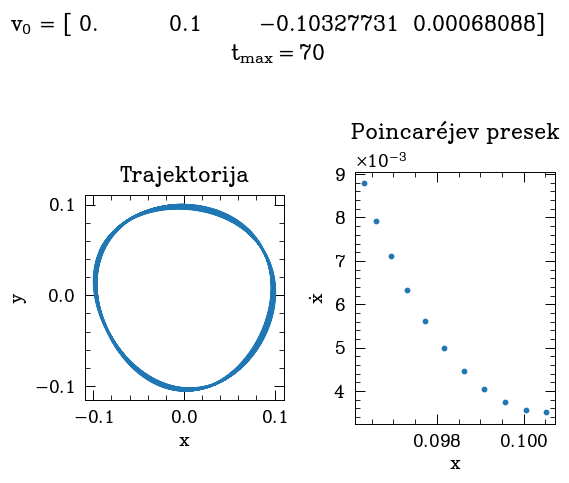

In [8]:
TMAX = 70
initial = np.array([0.0, 0.1, -0.10327731148312339, 0.000680881402723279])
test_initial(initial)
t_span = np.arange(0, TMAX, 0.01)
sol = solve_ivp(
        odes,
        t_span=[t_span.min(), t_span.max()],
        t_eval=t_span,
        tfirst=True,
        y0=initial,
        dense_output=True,
        rtol=1e-20,
        atol=1e-20,
        events=crosses_x,
    )
fig, [ax1, ax2] = plt.subplots(ncols=2)
ax1.plot(sol.y[0, :], sol.y[1, :])
ax1.set_aspect("equal")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax2.scatter(sol.y_events[0][:, 0], sol.y_events[0][:, 2], s=10, marker="o", edgecolors="face")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\dot{x}$")
plt.gca().set_aspect("equal")
plt.tight_layout()
fig.suptitle(f"$v_0$ = " + str(initial) +"\n"+ fr"$t_{'{max}'}={TMAX}$")
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
# plt.savefig("images/2-0-testna-orbita.pdf")
plt.show()

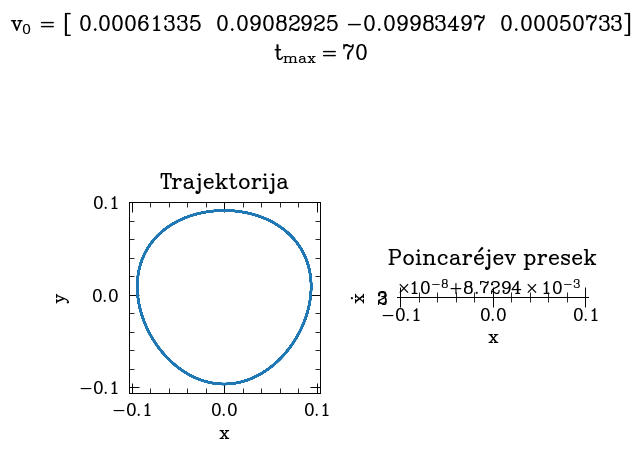

In [9]:
TMAX = 70
initial = np.array([ 0.00061335,  0.09082925, -0.09983497,  0.00050733])
test_initial(initial)
t_span = np.arange(0, TMAX, 0.01)
sol = solve_ivp(
        odes,
        t_span=[t_span.min(), t_span.max()],
        t_eval=t_span,
        tfirst=True,
        y0=initial,
        dense_output=True,
        rtol=1e-20,
        atol=1e-20,
        events=crosses_x,
    )
fig, [ax1, ax2] = plt.subplots(ncols=2,
                               sharex=True
                               )
ax1.plot(sol.y[0, :], sol.y[1, :])
ax1.set_aspect("equal")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax2.scatter(sol.y_events[0][:, 0], sol.y_events[0][:, 2], s=10, marker="o", edgecolors="face")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\dot{x}$")
# plt.gca().set_aspect("equal")
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
fig.suptitle(f"$v_0$ = " + str(initial) +"\n"+ fr"$t_{'{max}'}={TMAX}$"+"\n\n")
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
# plt.savefig("images/2-0-testna-orbita.pdf")
plt.show()

In [10]:
sol.t_events[0].shape

(11,)

In [11]:
from tqdm import tqdm
for i in tqdm(range(3, 100)):
    # initial = (np.random.rand(4) - 0.5)/5
    H = 0.15
    X0 = 0.3
    Y0 = 0
    V = U(X0, Y0)
    T = H - V
    mag = np.sqrt(2 * T)
    alpha = np.random.random() * np.pi * 2
    u = mag * np.cos(alpha)
    v = mag * np.sin(alpha)
    initial = np.array([X0,Y0,u, v])
    try:
        sol = root(get_distance_after_1_pass, x0=initial)
    except:
        continue
    initial = sol.x
    TMAX = 30
    try:
        test_initial(initial)
    except AssertionError:
        continue
    t_span = np.arange(0, TMAX, 0.01)
    sol = solve_ivp(
            odes,
            t_span=[t_span.min(), t_span.max()],
            t_eval=t_span,
            tfirst=True,
            y0=initial,
            dense_output=True,
            rtol=1e-20,
            atol=1e-20,
            events=crosses_x,
        )
    fig, [ax1, ax2] = plt.subplots(ncols=2,
                                sharex=True
                                )
    ax1.plot(sol.y[0, :], sol.y[1, :])
    ax1.set_aspect("equal")
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$y$")
    ax2.scatter(sol.y_events[0][:, 0], sol.y_events[0][:, 2], s=10, marker="o", edgecolors="face")
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$\dot{x}$")
    # plt.gca().set_aspect("equal")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    fig.suptitle(f"$v_0$ = " + str(initial) +"\n"+ fr"$t_{'{max}'}={TMAX}$"+"\n\n")
    ax1.set_title("Trajektorija")
    ax2.set_title("Poincaréjev presek")
    plt.savefig(f"images/2-1-periorbita-{i}.pdf")
    plt.show()

  0%|          | 0/97 [00:00<?, ?it/s]

100%|██████████| 97/97 [29:05<00:00, 18.00s/it]
